<a href="https://colab.research.google.com/github/mborkhat/MTech_AI/blob/main/CW/20230730_Lab_2_MTech_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
ipd.Audio('/content/angry_woman.wav')

In [ ]:
ipd.Audio('/content/angry_man.wav')

# Waveform : AMP VS TIME DOMAIN

In [ ]:
#x_1, sr_1 = librosa.load('/content/example_music.mp3')

In [ ]:
#del x_1,sr_1

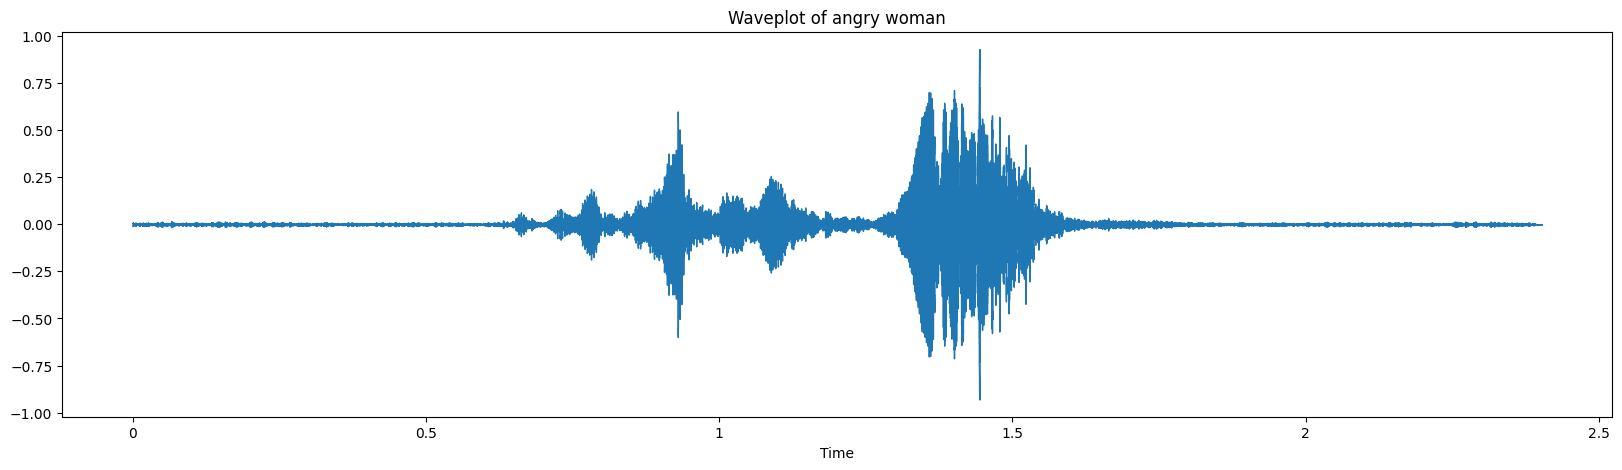

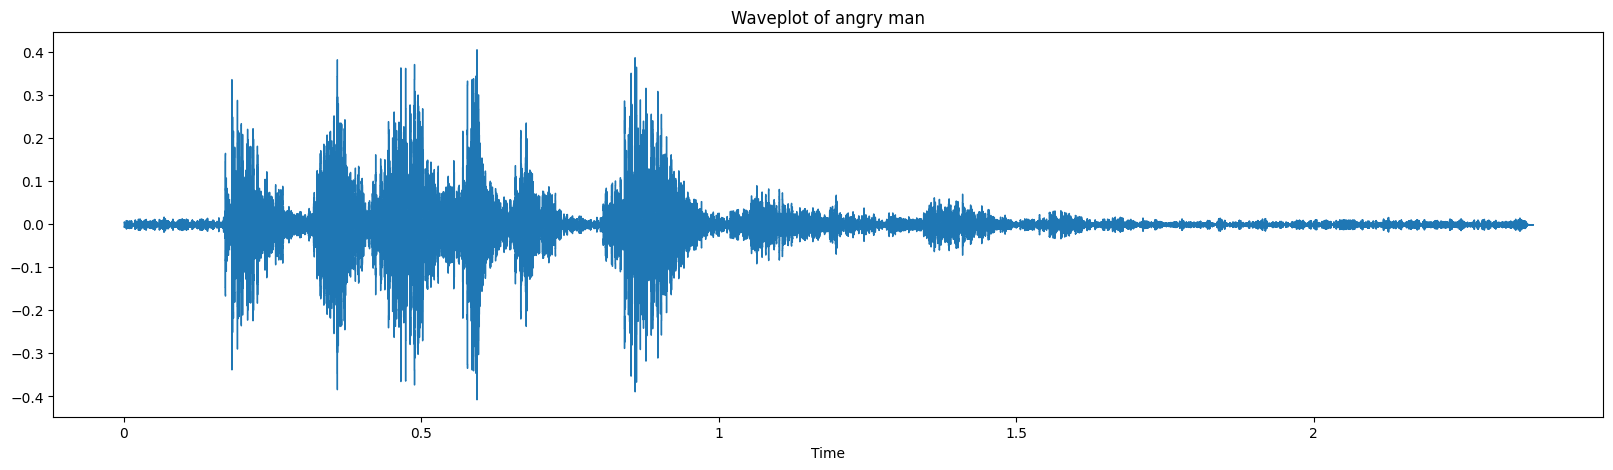

In [ ]:
x , sr = librosa.load('/content/angry_woman.wav')
plt.figure(figsize=(20, 5))
plt.title('Waveplot of angry woman')
librosa.display.waveshow(x, sr=sr)
plt.show()


#x_1 , sr_1 = librosa.load('/content/angry_man.wav')
x_ , sr_ = librosa.load('/content/angry_man.wav')
plt.figure(figsize=(20, 5))
plt.title('Waveplot of angry man')
librosa.display.waveshow(x_, sr=sr)
plt.show()

# Spectogram : Specto Frequency : Amp vs Frequency

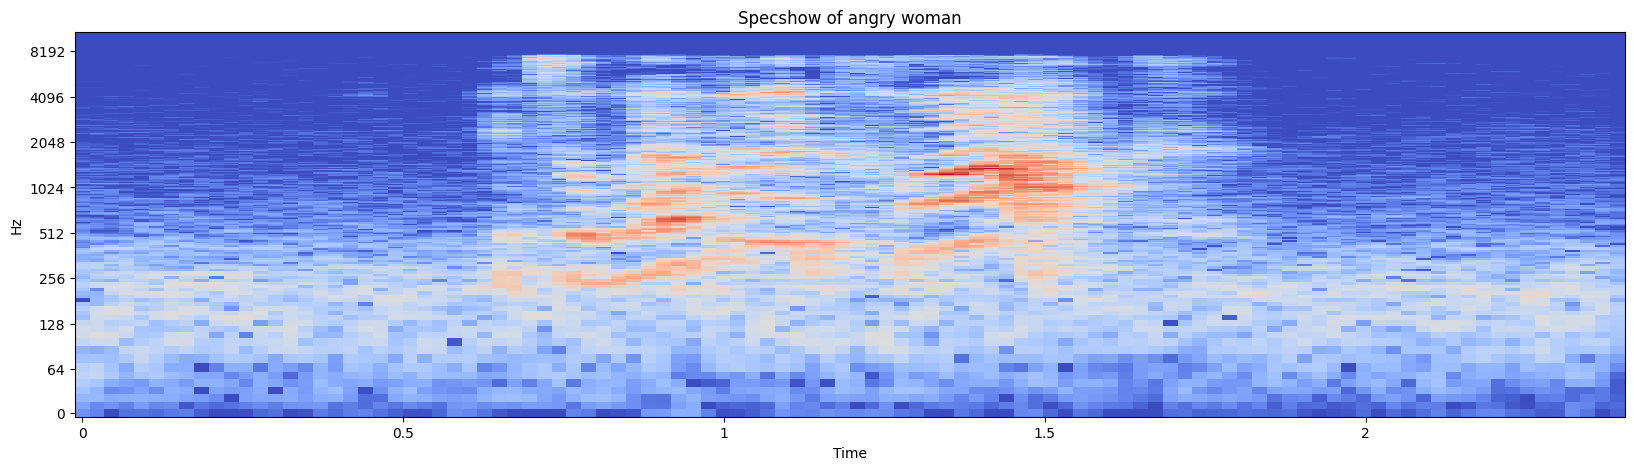

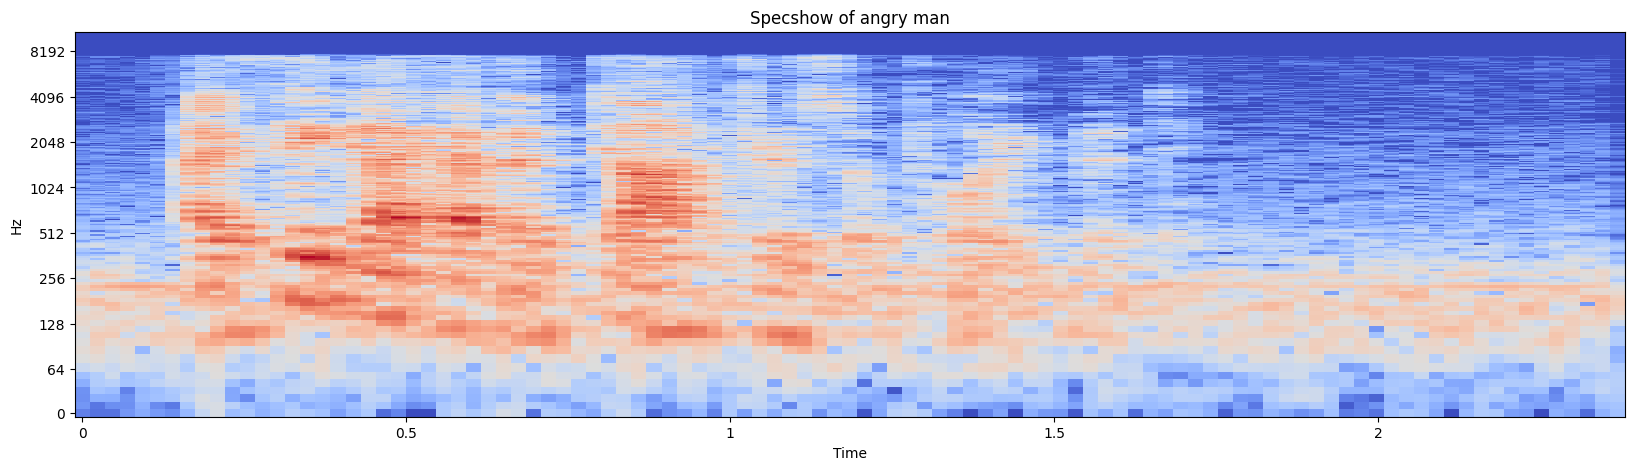

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Specshow of angry woman')
# Short term Fourier Transform
X = librosa.stft(x) #short time fourier trasnform : for time to frequency domain

# Amplitude of given frequency at a given time of an audio signal
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.show()

plt.figure(figsize=(20, 5))
plt.title('Specshow of angry man')
# Short term Fourier Transform
X = librosa.stft(x_)

# Amplitude of given frequency at a given time of an audio signal
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sr_, x_axis='time', y_axis='log')
plt.show()

# Zero Cross Rating

At what time how much signal is changing its direction. (positive to negative)

By examining the zero-crossing rate plot, one can gain insights into the noisiness or noisefullness of the audio.

Sum of zero crossing  4900


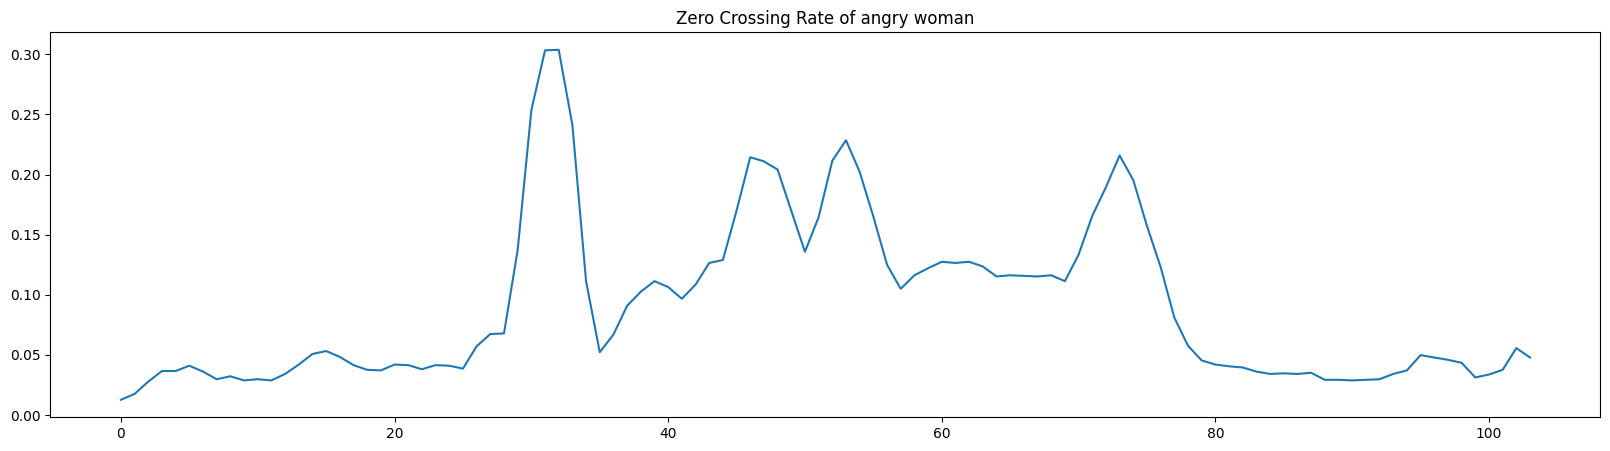

Sum of zero crossing  3815


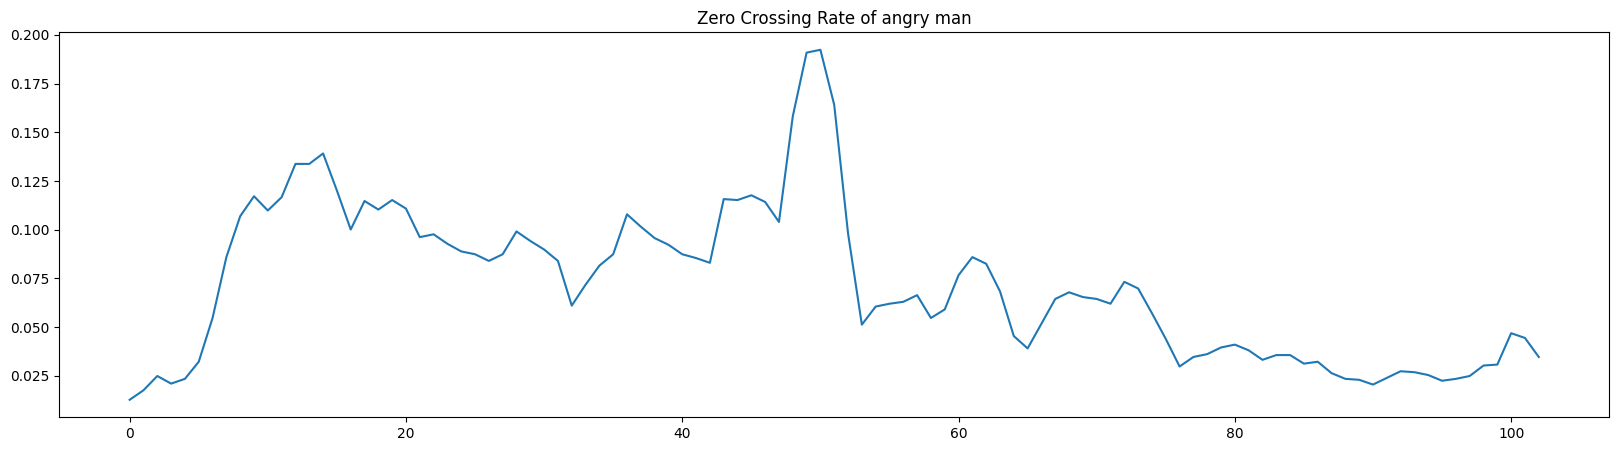

In [ ]:
zero_crossings = librosa.zero_crossings(x)
print("Sum of zero crossing ", zero_crossings.sum())
plt.figure(figsize=(20, 5))
plt.title('Zero Crossing Rate of angry woman')
zcrs = librosa.feature.zero_crossing_rate(x)
plt.plot(zcrs[0])
plt.show()

zero_crossings = librosa.zero_crossings(x_)
print("Sum of zero crossing ", zero_crossings.sum())
plt.figure(figsize=(20, 5))
plt.title('Zero Crossing Rate of angry man')
zcrs = librosa.feature.zero_crossing_rate(x_)
plt.plot(zcrs[0])
plt.show()

In [ ]:
#A zero crossing occurs when the sign of the audio signal changes from positive to negative or vice versa
#
zc = librosa.zero_crossings(x)
print(sum(zc))
zc = librosa.zero_crossings(x_)
print(sum(zc))

4900
3815


# Spectral Centroids :
Where center of mass/sound is present

Wtg mean of Frequency

indicating where the "brightness" of the sound is located in the frequency domain

In [ ]:
from sklearn.preprocessing import minmax_scale
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

In [ ]:
# plt.figure(figsize=(20, 5))
# plt.title('Spectral Centroids of angry woman')
# spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
# frames = range(len(spectral_centroids))
# t = librosa.frames_to_time(frames)
# librosa.display.waveshow(x,sr=sr, alpha=0.4)
# plt.plot(t, normalize(spectral_centroids), color='r')
# plt.show()


# #Red is frequency

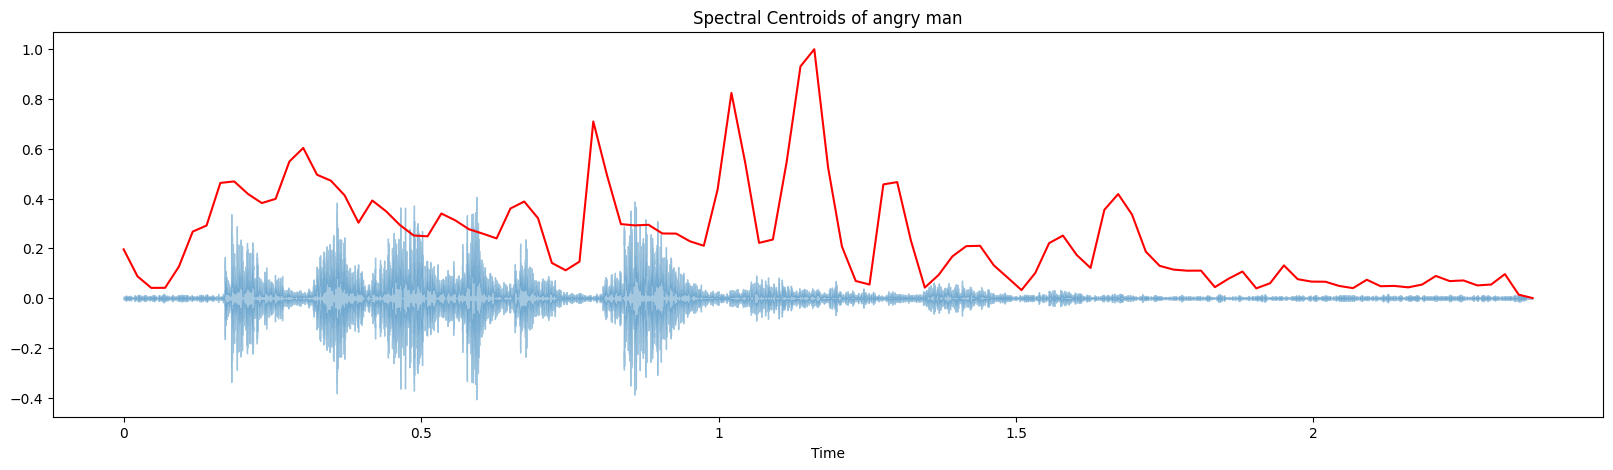

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Spectral Centroids of angry man')
spectral_centroids = librosa.feature.spectral_centroid(y=x_, sr=sr_)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(x_,sr=sr_, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()


#Red is frequency

# Spectral Rolloff

Frequency below specified perc of total spectral lies

It indicates how much energy is concentrated in the lower frequencies of the spectrum

In [ ]:
# plt.figure(figsize=(20, 5))
# plt.title('Spectral Rolloff of angry man')
# spectral_rolloff = librosa.feature.spectral_rolloff(y=x_, sr=sr_, roll_percent=0.01)[0]
# frames = range(len(spectral_rolloff))
# t = librosa.frames_to_time(frames)
# librosa.display.waveshow(x_,sr=sr_, alpha=0.4)
# plt.plot(t, normalize(spectral_rolloff), color='r')
# plt.show()

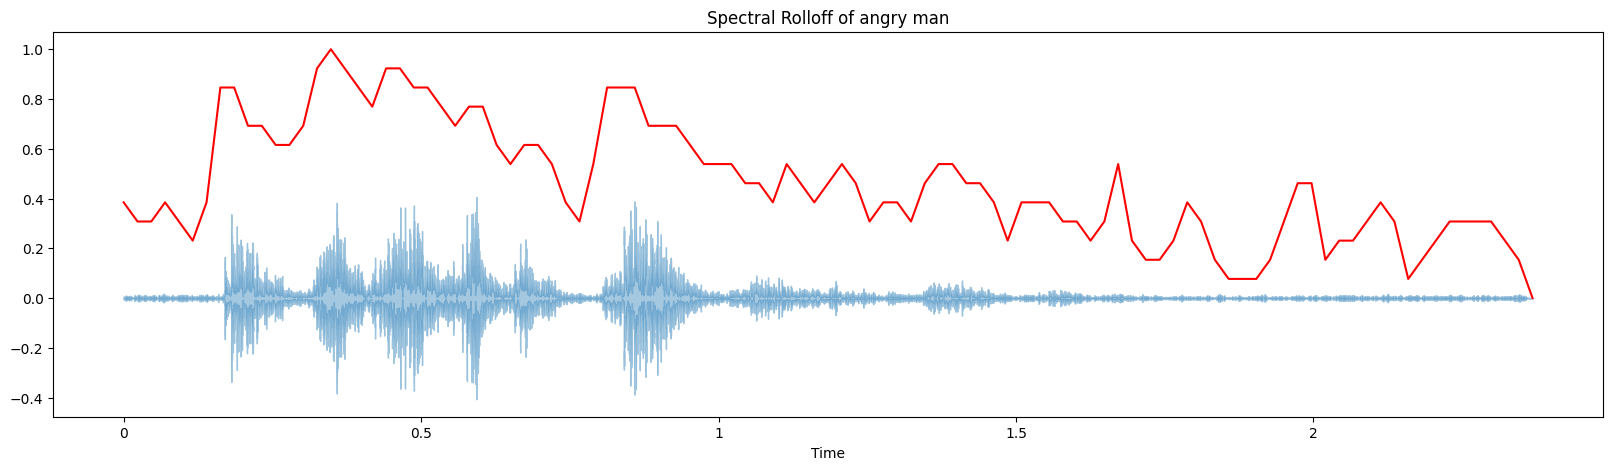

In [ ]:
plt.figure(figsize=(20, 5))
plt.title('Spectral Rolloff of angry man')
spectral_rolloff = librosa.feature.spectral_rolloff(y=x_, sr=sr_, roll_percent=0.01)[0]
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(x_,sr=sr_, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()

In [ ]:
#the centroid highlights the perceived pitch or brightness, while the rolloff indicates the frequency range where most of the energy lies

# MFCC and Mel Spectrogram

Gives Shape of Audio, What kind of properties audio poses

(20, 104)


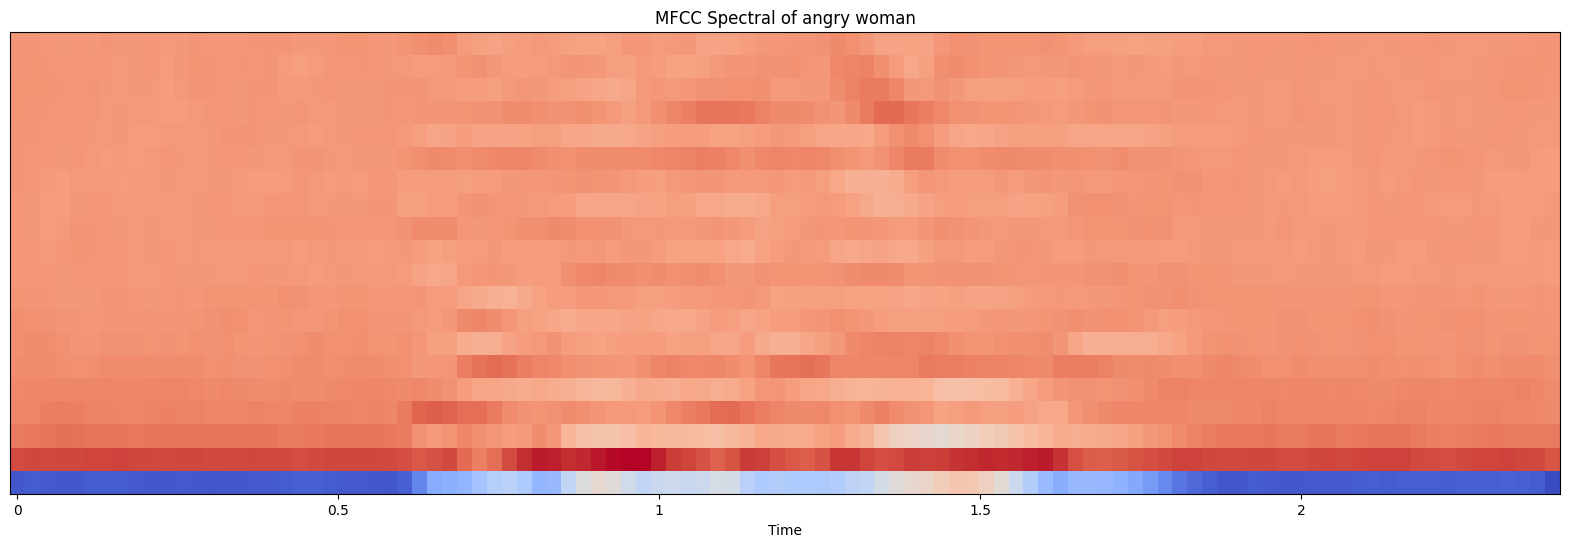

(20, 103)


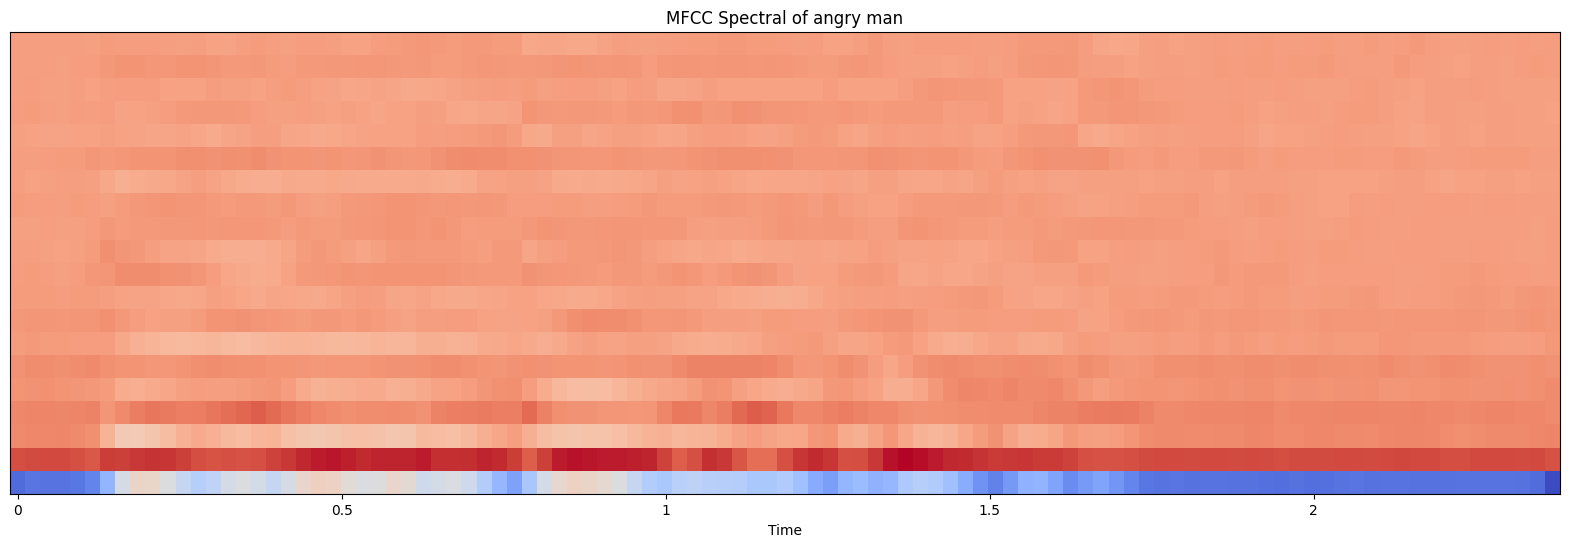

In [ ]:
plt.figure(figsize=(20, 6))
plt.title('MFCC Spectral of angry woman')
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape) #no of mfccs,no of frames
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.show()

plt.figure(figsize=(20, 6))
plt.title('MFCC Spectral of angry man')
mfccs = librosa.feature.mfcc(y=x_, sr=sr_)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr_, x_axis='time')
plt.show()

#The colors in the spectrogram indicate the intensity or magnitude of each MFCC coefficient at different time frames.
#See red pard in fig

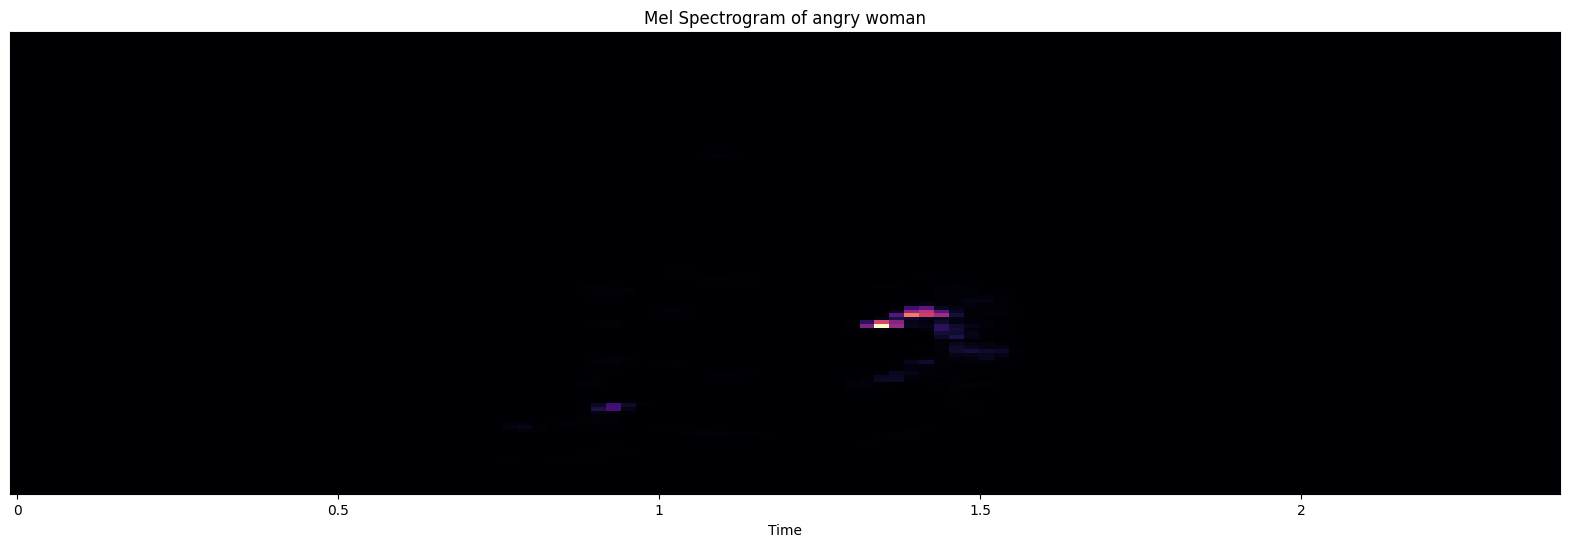

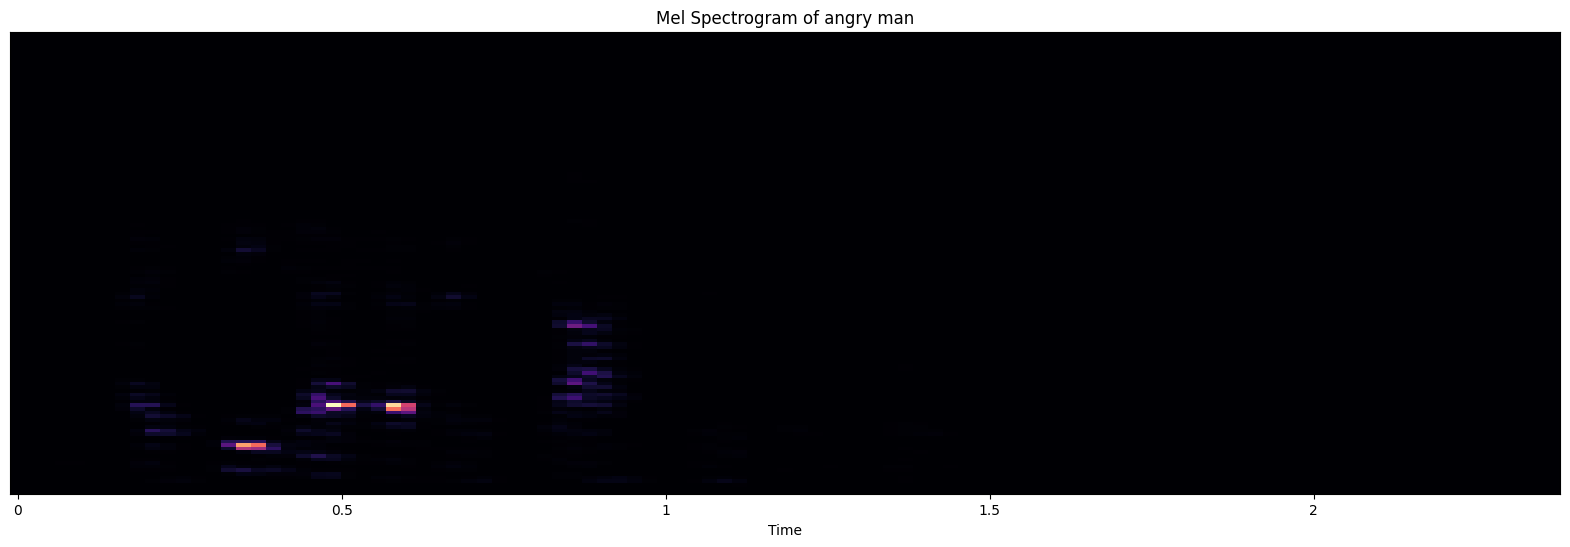

In [ ]:
plt.figure(figsize=(20, 6))
plt.title('Mel Spectrogram of angry woman')
mel_spec = librosa.feature.melspectrogram(y=x, sr=sr)
librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
plt.show()

plt.figure(figsize=(20, 6))
plt.title('Mel Spectrogram of angry man')
mel_spec = librosa.feature.melspectrogram(y=x_, sr=sr_)
librosa.display.specshow(mel_spec, sr=sr_, x_axis='time')
plt.show()

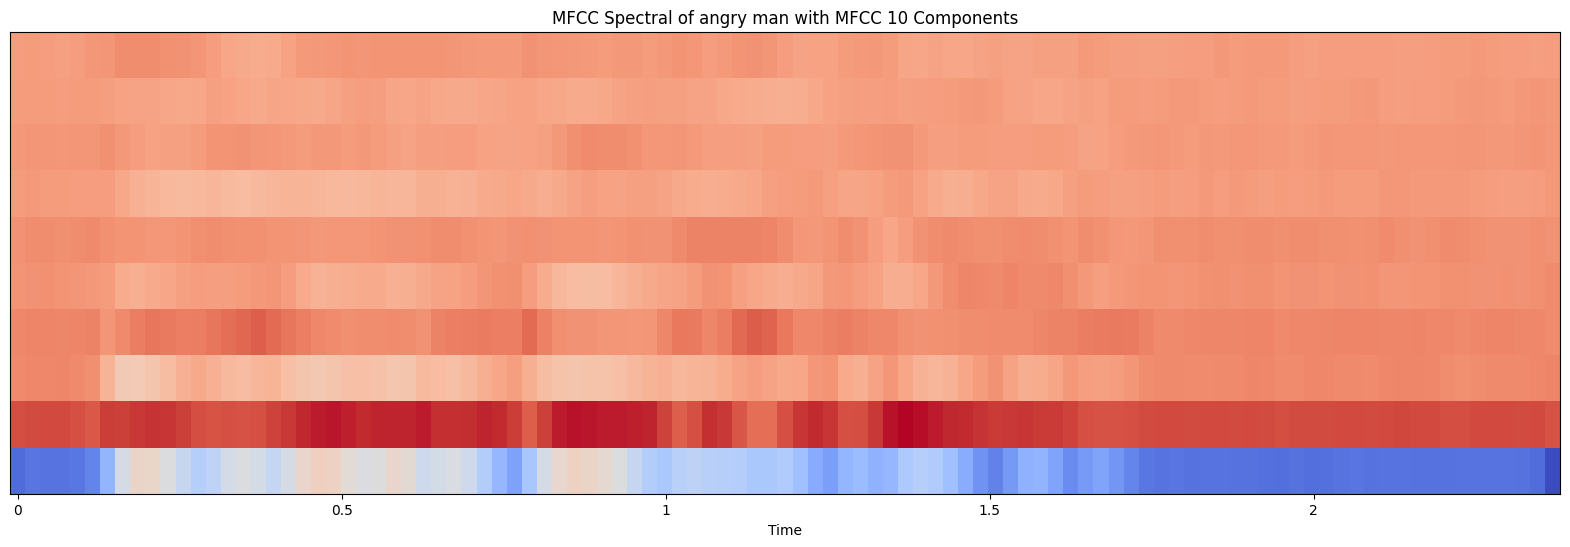

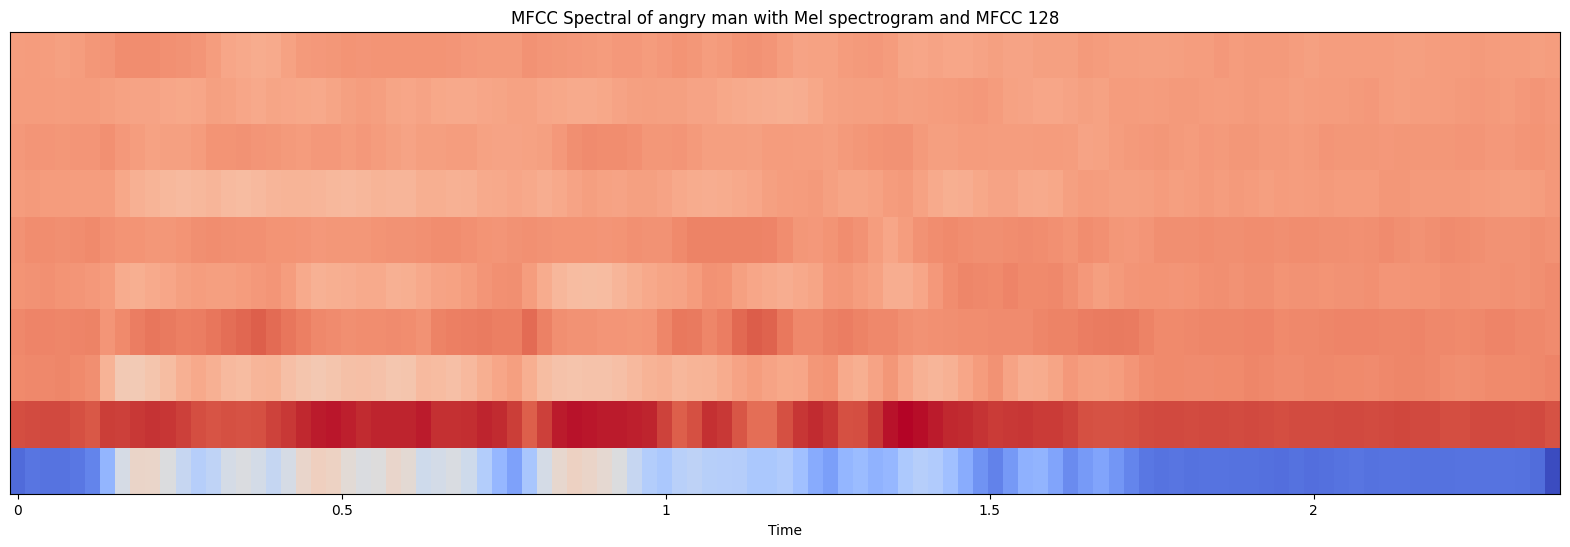

In [ ]:
plt.figure(figsize=(20, 6))
plt.title('MFCC Spectral of angry man with MFCC 10 Components')
mfccs = librosa.feature.mfcc(y=x_, sr=sr_, n_mfcc=10)
librosa.display.specshow(mfccs, sr=sr_, x_axis='time')
plt.show()

plt.figure(figsize=(20, 6))
plt.title('MFCC Spectral of angry man with Mel spectrogram and MFCC 128')
S = librosa.feature.melspectrogram(y=x_, sr=sr_, n_mels=128)
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=10)
librosa.display.specshow(mfccs, sr=sr_, x_axis='time')
plt.show()

# Extracting fratures for model

In [ ]:
np.mean(librosa.feature.melspectrogram(y=x, sr=sr).T,axis=0)
np.mean(librosa.feature.mfcc(y=x, sr=sr).T,axis=0)

array([-353.7064   ,  102.908554 ,   -4.306861 ,   19.329933 ,
         -4.6547284,   16.281538 ,   -4.9760904,   -4.96709  ,
         -8.001787 ,   -2.5993488,  -10.833074 ,   -3.637062 ,
        -11.912431 ,   -9.459443 ,    3.6057086,  -13.109823 ,
          2.3680425,   -5.303577 ,   -4.7672553,   -6.652357 ],
      dtype=float32)


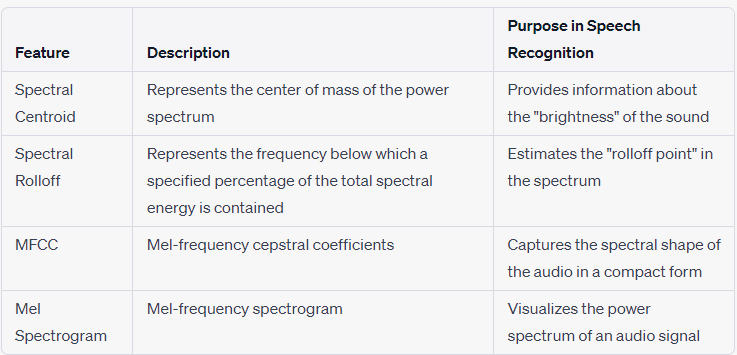

Spectral Centroid:

The spectral centroid represents the average frequency of a sound signal, weighted by its intensity.
It provides information about the "brightness" or "tonal center" of the sound.
In speech recognition, it can help distinguish between sounds with different pitch characteristics.
Spectral Rolloff:

The spectral rolloff represents the frequency below which a specified percentage (e.g., 85%) of the total spectral energy is contained.
It provides an estimate of the "rolloff point" in the spectrum, which indicates the cutoff between low-frequency noise and higher-frequency content.
In speech recognition, it can help separate background noise from useful speech signals.
MFCC (Mel-frequency cepstral coefficients):

MFCCs are a compact representation of the spectral shape of an audio signal.
They are derived by taking the Fourier Transform of the audio signal, mapping the resulting spectrum to the mel scale, and applying the discrete cosine transform (DCT) to obtain the coefficients.
MFCCs capture important features related to the human auditory system and are commonly used as inputs for speech recognition models.
Mel Spectrogram:

The mel spectrogram is a visual representation of the power spectrum of an audio signal, with frequencies mapped to the mel scale.
It provides a time-frequency representation of the audio signal, showing how the power of different frequency components changes over time.
Mel spectrograms are useful for analyzing the spectral content and temporal dynamics of speech signals.
Please note that the differences between these features lie in the specific aspects they capture and the representations they provide. Each feature has its own advantages and applications in speech recognition and audio analysis.